# Chemistry Quantum Advantage

In [30]:
import importlib
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from copy import deepcopy
from decimal import Decimal, getcontext, DecimalException
from scipy.optimize import curve_fit
from matplotlib.font_manager import FontProperties
import quantum_lib
importlib.reload(quantum_lib)
from quantum_lib import *

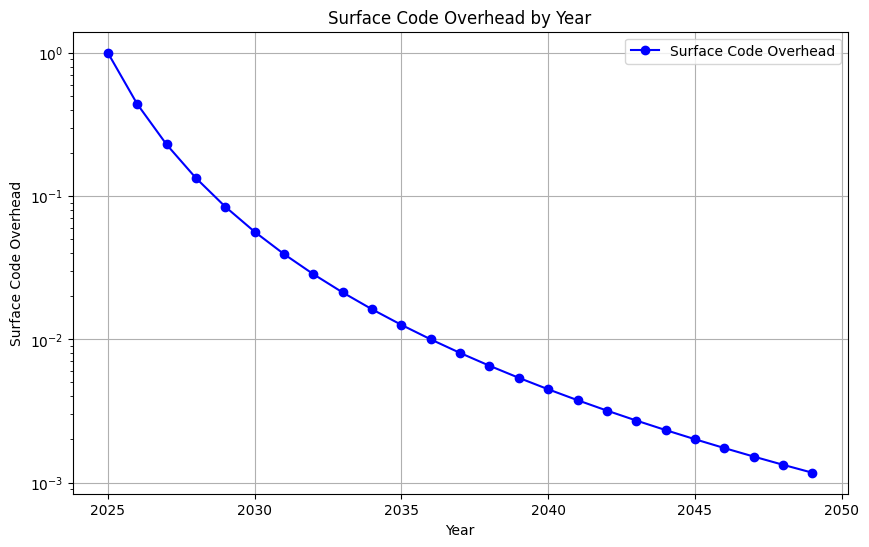

1.0
45.911259505028504 surface code overhead in 2050
1.0


In [46]:
# graph suface code overhead over time
years = np.arange(2025, 2050)
fidelity_improvement_rate = 0.7
surface_code_overhead_init = surface_code_formula(initial_error*fidelity_improvement_rate**(2025-2025))
surface_code_overhead_list = [(surface_code_formula(initial_error*fidelity_improvement_rate**(year-2025))/surface_code_formula(initial_error))**1.5 for year in years]
plt.figure(figsize=(10, 6))
plt.plot(years, surface_code_overhead_list, marker='o', linestyle='-', color='b', label='Surface Code Overhead')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('Surface Code Overhead')
plt.title('Surface Code Overhead by Year')
plt.grid(True)
plt.legend()
plt.show()
print(surface_code_overhead_list[0])
print(surface_code_formula(initial_error*(fidelity_improvement_rate**(2050-2025))), "surface code overhead in 2050")
print(surface_code_formula(initial_error*(fidelity_improvement_rate**(2025-2025)))/surface_code_formula(initial_error))



Error in function evaluation: unsupported operand type(s) for -: 'NoneType' and 'int'
the intersection year of fci and quantum max computable problem size is  2034.0243415565055
125 quantum_economic_advantages_fci
125 quantum_problem_sizes


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3881692789.py:100: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(intersection_year_fci, intersection_value_fci, 'ro', color="black")


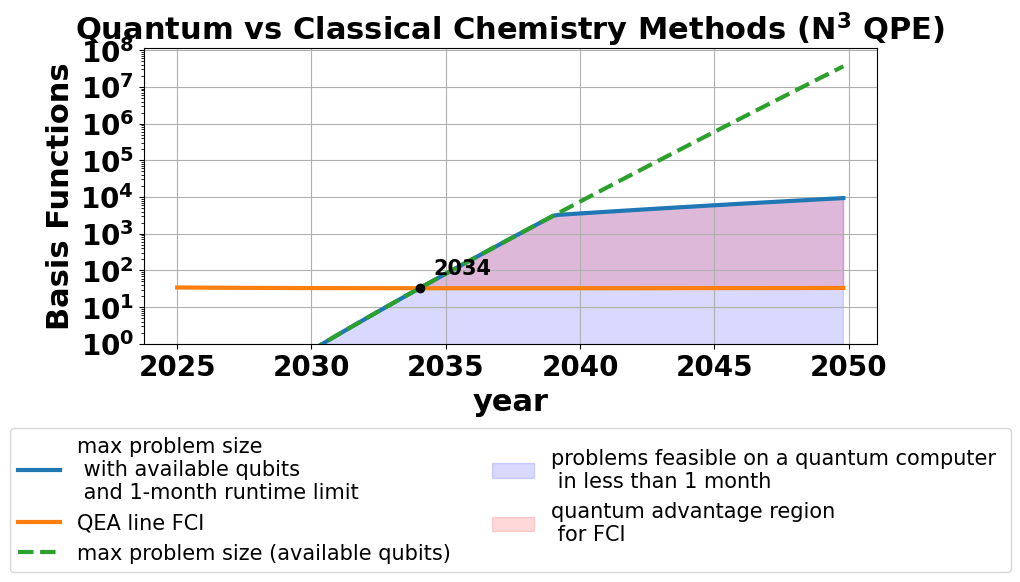

In [47]:
#bolder version for poster 

#add moller plesset
classical_runtime_mp2 = "n**5"
classical_runtime = "n**6"
quantum_runtime = "1e3*n**3"
classical_runtime_ccsdpt = "n**8"
classical_runtime_fci = "4**n"


alg_overhead_qspeed = 1e0
alg_overhead_qubit = 1e1
classical_alg_overhead = 1e0

# Define years first before using it
years = np.arange(MIN_YEAR, MAX_YEAR, .2)

#set figsize
plt.figure(figsize=(10, 7))
roadmap = default_roadmap
qubit_feasible_line= [problem_size_qubit_feasible(year) for year in years]


# graph largeset problem size vs year for grovers algorithms
quantum_problem_sizes = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]
# print(classical_problem_sizes_ccsdpt)

# quantum_economic_advantages_ccsd = [
#     quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime) for year in years
# ]
quantum_economic_advantages_ccsdpt = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_fci = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime) for year in years
]

# quantum_economic_advantages_mp2 = [
#     quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_mp2, quantum_runtime_string=quantum_runtime) for year in years
# ]
quantum_advantage_size_by_year_list= [
quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime) for year in years
]


def find_largest_problem_size_func(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True)

def quantum_advantage_size_by_year_func(year):
    return quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime)
# Find the intersection year using binary search
intersection_year = binary_search_intersection(find_largest_problem_size_func, quantum_advantage_size_by_year_func, MIN_YEAR, MAX_YEAR)


# Find the intersection value
intersection_value = find_largest_problem_size(quantum_runtime, intersection_year, quantum=True)
#====================================================================================================

#plotting code 
# plt.figure(figsize=(10, 6))
#plotting code 
plt.plot(years, quantum_problem_sizes, label="max problem size \n with available qubits \n and 1-month runtime limit", linewidth=3)
# plt.plot(years, quantum_economic_advantages_ccsd, label="quantum economic advantage ccsd", linewidth=3)
# plt.plot(years, quantum_economic_advantages_ccsdpt, label="quantum economic advantage ccsdpt", linewidth=3)
plt.plot(years, quantum_economic_advantages_fci, label="QEA line FCI", linewidth=3)
# plt.plot(years, quantum_economic_advantages_mp2, label="quantum economic advantage mp2", linewidth=3)
plt.plot(years, qubit_feasible_line, label="max problem size (available qubits)", linewidth=3, linestyle='--')


# plt.plot(years, classical_problem_sizes_ccsdpt, label="ccsdpt max computable problem size (1-week)", linewidth=3)
plt.ylabel("Basis Functions", fontsize=22, fontweight='bold')
plt.xlabel("year", fontsize=22, fontweight='bold')
tick_positions = np.logspace(0, 50, num=10, base=10)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.yscale("log")
plt.title("Quantum vs Classical Chemistry Methods ($\mathbf{N^3}$ QPE)", fontsize=22, fontweight='bold')
plt.grid() 
#move the legend to the upper right


# Adjust layout to prevent text cutoff

#====================================================================
# Find intersection between quantum max computable problem size and quantum economic advantage fci
intersection_year_fci = binary_search_intersection(
    find_largest_problem_size_func,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
print("the intersection year of fci and quantum max computable problem size is ", intersection_year_fci)

# Only plot if intersection was found
if intersection_year_fci is not None:
    intersection_value_fci = find_largest_problem_size(quantum_runtime, intersection_year_fci, quantum=True)
    
    # Plot the intersection point
    plt.plot(intersection_year_fci, intersection_value_fci, 'ro', color="black")
    plt.annotate(f'{round(intersection_year_fci)}',
                xy=(intersection_year_fci, intersection_value_fci),
                xytext=(10, 10), textcoords='offset points', fontsize=15, fontweight='bold')
else:
    print("No intersection found for FCI within the specified range")

#same as above but for ccsdpt


# intersection_year_ccsdpt = binary_search_intersection(
#     find_largest_problem_size_func,
#     lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime),
#     MIN_YEAR, MAX_YEAR
# )
# print("the intersection year for ccsdpt is ", intersection_year_ccsdpt)
# intersection_value_ccsdpt = find_largest_problem_size(quantum_runtime, intersection_year_ccsdpt, quantum=True)
# plt.plot(intersection_year_ccsdpt, intersection_value_ccsdpt, 'ro', color="black")
# plt.annotate(f'{round(intersection_year_ccsdpt)}',
#             xy=(intersection_year_ccsdpt, intersection_value_ccsdpt),
#             xytext=(10, 10), textcoords='offset points', fontsize=15, fontweight='bold')


plt.ylim(1e0)

plt.fill_between(years, 0, quantum_problem_sizes,
                    color='blue', alpha=0.15, label='problems feasible on a quantum computer \n in less than 1 month')


print(len(quantum_economic_advantages_fci), "quantum_economic_advantages_fci")
print(len(quantum_problem_sizes), "quantum_problem_sizes")
plt.fill_between(years, quantum_economic_advantages_fci, quantum_problem_sizes,
                 color='red', alpha=0.15, label='quantum advantage region \n for FCI',
                 where=(np.array(quantum_problem_sizes) >= np.array(quantum_economic_advantages_fci)))



plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize=15)
plt.ylim()
plt.tight_layout(rect=[0, 0, 1, 0.95], pad=1.5)  # Add padding and adjust height
plt.savefig("Figures/generalized_qea_model.png", bbox_inches='tight', dpi=300)  # Use bbox_inches to


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3589306980.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[0].plot(intersection_year_fci_n2, intersection_value_fci_n2, 'ro', color="black")
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3589306980.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[0].plot(intersection_year_ccsdpt_n2, intersection_value_ccsdpt_n2, 'ro', color="black")
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3589306980.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[0].plot(intersection_year_mp2_n2, intersection_value_mp2_n2, 'ro', color="black")
/var/folde

Error in function evaluation: unsupported operand type(s) for -: 'NoneType' and 'int'


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3589306980.py:171: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[1].plot(intersection_year_fci_n3, intersection_value_fci_n3, 'ro', color="black")
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3589306980.py:182: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[1].plot(intersection_year_ccsdpt_n3, intersection_value_ccsdpt_n3, 'ro', color="black")


Error in function evaluation: unsupported operand type(s) for -: 'NoneType' and 'int'


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_9643/3589306980.py:240: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[2].plot(intersection_year_fci_n5, intersection_value_fci_n5, 'ro', color="black")


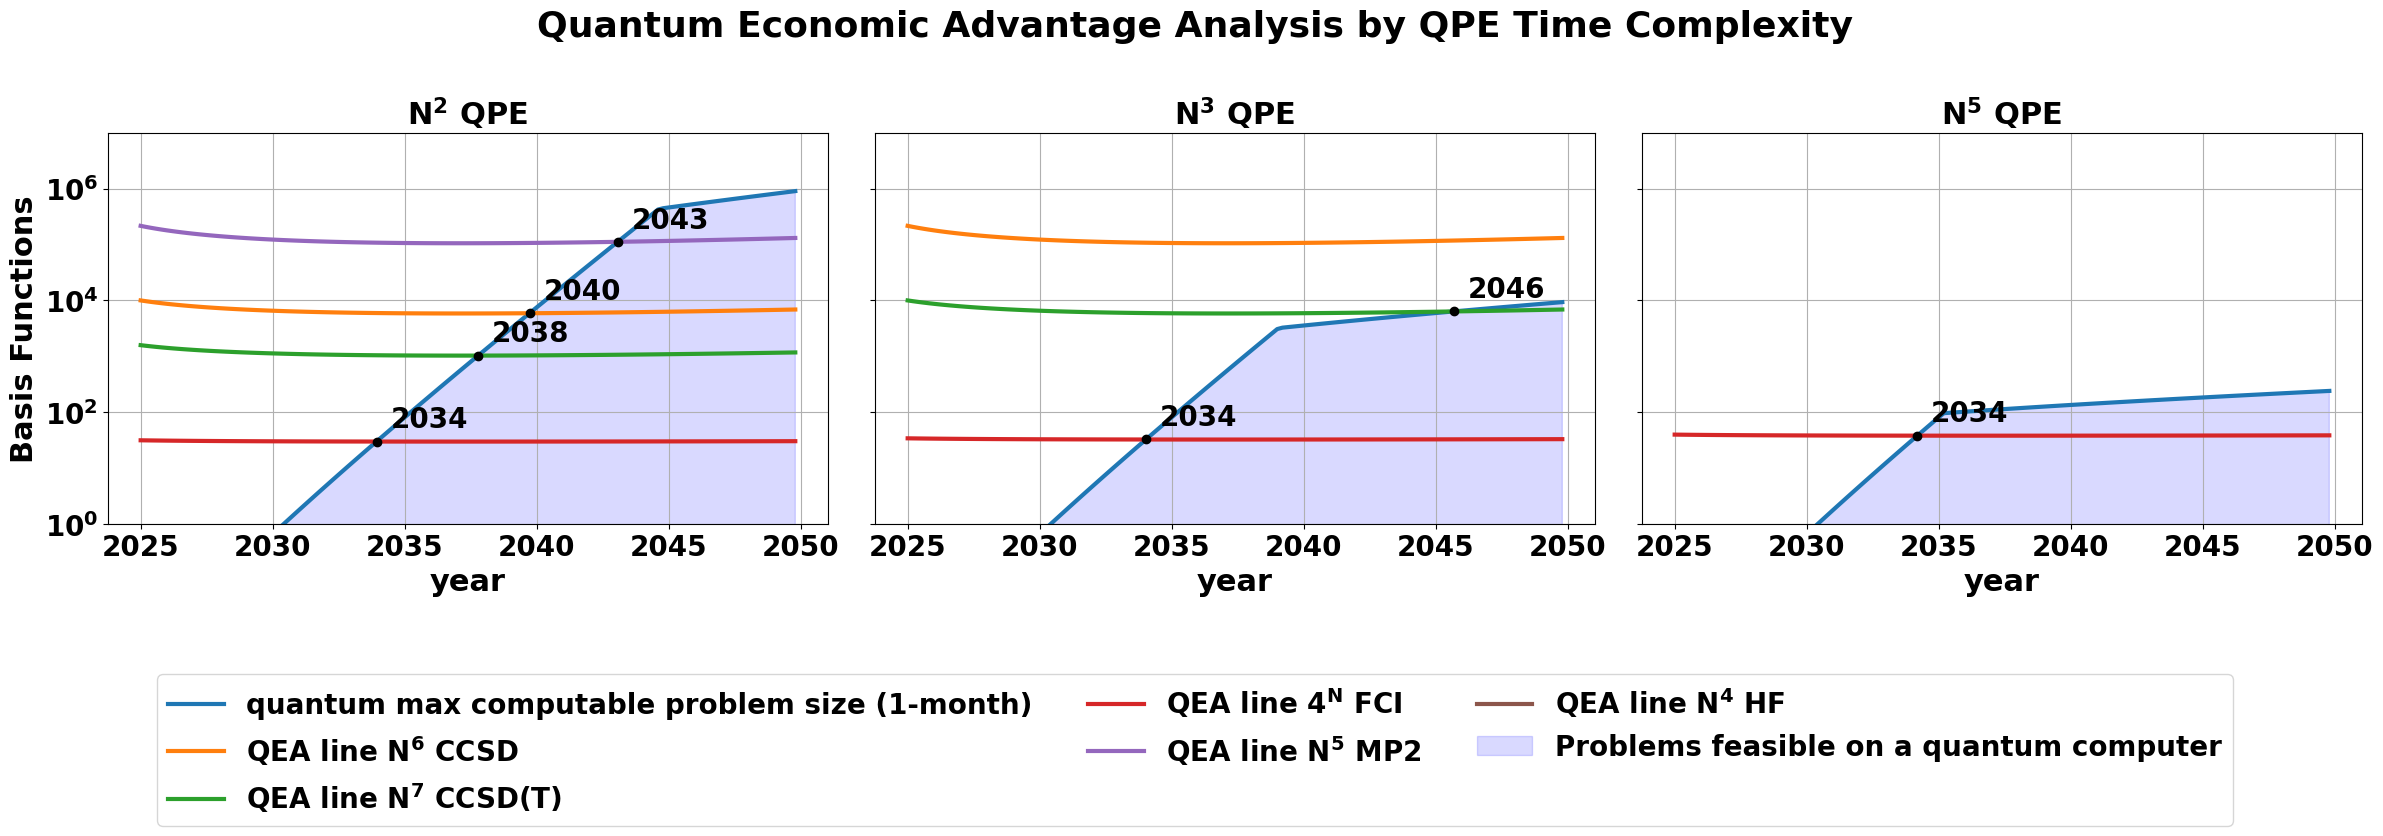

In [21]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharey=True)
plt.ylim(top=1e7)

#constant adjustment 
alg_overhead_qspeed = 1e0
alg_overhead_qubit = 1e1
classical_alg_overhead = 1e0

# Second subplot - n^2 QPE
classical_runtime_hf = "n**4"
classical_runtime_ccsd = "n**6"
classical_runtime_mp2 = "n**5"
classical_runtime_ccsdpt = "n**7"
classical_runtime_fci = "4**n"
quantum_runtime = "1e3*n**2"


annotation_size = 20

quantum_problem_sizes_n2 = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]
quantum_economic_advantages_hf_n2 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_hf, quantum_runtime_string=quantum_runtime) for year in years
]

quantum_economic_advantages_ccsd_n2 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsd, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_ccsdpt_n2 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_fci_n2 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_mp2_n2 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_mp2, quantum_runtime_string=quantum_runtime) for year in years
]

def find_largest_problem_size_func_n2(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True)

axes[0].plot(years, quantum_problem_sizes_n2, label="quantum max computable problem size (1-month)", linewidth=3)
axes[0].plot(years, quantum_economic_advantages_ccsd_n2, label=r"QEA line $\mathbf{N^6}$ CCSD", linewidth=3)
axes[0].plot(years, quantum_economic_advantages_ccsdpt_n2, label=r"QEA line $\mathbf{N^7}$ CCSD(T)", linewidth=3)
axes[0].plot(years, quantum_economic_advantages_fci_n2, label=r"QEA line $\mathbf{4^N}$ FCI", linewidth=3)
axes[0].plot(years, quantum_economic_advantages_mp2_n2, label=r"QEA line $\mathbf{N^5}$ MP2", linewidth=3)
axes[0].plot(years, quantum_economic_advantages_hf_n2, label=r"QEA line $\mathbf{N^4}$ HF", linewidth=3)

axes[0].set_xlabel("year", fontsize=22, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=20)  # Removed invalid labelweight parameter
for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
    label.set_fontweight('bold')
axes[0].set_yscale("log")
axes[0].set_title(r"$\mathbf{N^2}$ QPE", fontsize=22, fontweight='bold')
axes[0].grid()
axes[0].set_ylim(1e0)

axes[0].fill_between(years, 0, quantum_problem_sizes_n2,
                   color='blue', alpha=0.15, label='Problems feasible on a quantum computer')

# Plot intersection points for n^2 QPE
intersection_year_fci_n2 = binary_search_intersection(
    find_largest_problem_size_func_n2,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_fci_n2 = find_largest_problem_size(quantum_runtime, intersection_year_fci_n2, quantum=True)
axes[0].plot(intersection_year_fci_n2, intersection_value_fci_n2, 'ro', color="black")
axes[0].annotate(f'{int(round(intersection_year_fci_n2))}',
               xy=(intersection_year_fci_n2, intersection_value_fci_n2),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')

intersection_year_ccsdpt_n2 = binary_search_intersection(
    find_largest_problem_size_func_n2,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_ccsdpt_n2 = find_largest_problem_size(quantum_runtime, intersection_year_ccsdpt_n2, quantum=True)
axes[0].plot(intersection_year_ccsdpt_n2, intersection_value_ccsdpt_n2, 'ro', color="black")
axes[0].annotate(f'{int(round(intersection_year_ccsdpt_n2))}',
               xy=(intersection_year_ccsdpt_n2, intersection_value_ccsdpt_n2),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')
axes[0].set_ylabel("Basis Functions", fontsize=22, fontweight='bold')

intersection_year_mp2_n2 = binary_search_intersection(
    find_largest_problem_size_func_n2,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_mp2, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_mp2_n2 = find_largest_problem_size(quantum_runtime, intersection_year_mp2_n2, quantum=True)
axes[0].plot(intersection_year_mp2_n2, intersection_value_mp2_n2, 'ro', color="black")
axes[0].annotate(f'{int(round(intersection_year_mp2_n2))}',
               xy=(intersection_year_mp2_n2, intersection_value_mp2_n2),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')


intersection_year_ccsd_n2 = binary_search_intersection(
    find_largest_problem_size_func_n2,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsd, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_ccsd_n2 = find_largest_problem_size(quantum_runtime, intersection_year_ccsd_n2, quantum=True)
axes[0].plot(intersection_year_ccsd_n2, intersection_value_ccsd_n2, 'ro', color="black")
axes[0].annotate(f'{int(round(intersection_year_ccsd_n2))}',
               xy=(intersection_year_ccsd_n2, intersection_value_ccsd_n2),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')

intersection_year_hf_n2 = binary_search_intersection(
    find_largest_problem_size_func_n2,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_hf, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_hf_n2 = find_largest_problem_size(quantum_runtime, intersection_year_hf_n2, quantum=True)
# axes[0].plot(intersection_year_hf_n2, intersection_value_hf_n2, 'ro', color="black")
# axes[0].annotate(f'{int(round(intersection_year_hf_n2))}',
#                xy=(intersection_year_hf_n2, intersection_value_hf_n2),
#                xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')


# First subplot: n^3 QPE
# ... existing code ...
years = np.arange(2025, 2050, .2)

# First subplot - n^3 QPE
quantum_runtime = "1e3*n**3"

quantum_problem_sizes_n3 = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]

quantum_economic_advantages_ccsd_n3 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_ccsdpt_n3 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_fci_n3 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime) for year in years
]

def find_largest_problem_size_func_n3(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True)

axes[1].plot(years, quantum_problem_sizes_n3, label="quantum max computable problem size (1-month)", linewidth=3)
axes[1].plot(years, quantum_economic_advantages_ccsd_n3, label=r"QEA line $N^6$ CCSD", linewidth=3)
axes[1].plot(years, quantum_economic_advantages_ccsdpt_n3, label=r"QEA line $N^7$ CCSD(T)", linewidth=3)
axes[1].plot(years, quantum_economic_advantages_fci_n3, label=r"QEA line $4^N$ FCI", linewidth=3)


axes[1].set_xlabel("year", fontsize=22, fontweight='bold')
axes[1].tick_params(axis='both', which='major', labelsize=20)  # Removed invalid labelweight parameter
for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
    label.set_fontweight('bold')
axes[1].set_yscale("log")
axes[1].set_title(r"$\mathbf{N^3}$ QPE", fontsize=22, fontweight='bold')
axes[1].grid()
# axes[1].set_ylim(1e0) #why this here

axes[1].fill_between(years, 0, quantum_problem_sizes_n3,
                   color='blue', alpha=0.15, label='problems feasible on a quantum computer')

# Plot intersection points for n^3 QPE
intersection_year_fci_n3 = binary_search_intersection(
    find_largest_problem_size_func_n3,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_fci_n3 = find_largest_problem_size(quantum_runtime, intersection_year_fci_n3, quantum=True)
axes[1].plot(intersection_year_fci_n3, intersection_value_fci_n3, 'ro', color="black")
axes[1].annotate(f'{int(round(intersection_year_fci_n3))}',
               xy=(intersection_year_fci_n3, intersection_value_fci_n3),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')

intersection_year_ccsdpt_n3 = binary_search_intersection(
    find_largest_problem_size_func_n3,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_ccsdpt_n3 = find_largest_problem_size(quantum_runtime, intersection_year_ccsdpt_n3, quantum=True)
axes[1].plot(intersection_year_ccsdpt_n3, intersection_value_ccsdpt_n3, 'ro', color="black")
axes[1].annotate(f'{int(round(intersection_year_ccsdpt_n3))}',
               xy=(intersection_year_ccsdpt_n3, intersection_value_ccsdpt_n3),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')

intersection_year_ccsd_n3 = binary_search_intersection(
    find_largest_problem_size_func_n3,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_ccsd_n3 = find_largest_problem_size(quantum_runtime, intersection_year_ccsd_n3, quantum=True)
# axes[1].plot(intersection_year_ccsd_n3, intersection_value_ccsd_n3, 'ro', color="black")
# axes[1].annotate(f'{int(round(intersection_year_ccsd_n3))}',
#                xy=(intersection_year_ccsd_n3, intersection_value_ccsd_n3),
#                xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')


# Third subplot - n^5 QPE
classical_runtime = "n**6"
quantum_runtime = "1e3*n**5"

quantum_problem_sizes_n5 = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]

quantum_economic_advantages_ccsdpt_n5 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime) for year in years
]
quantum_economic_advantages_fci_n5 = [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime) for year in years
]

def find_largest_problem_size_func_n5(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True)

axes[2].plot(years, quantum_problem_sizes_n5, label="quantum max computable problem size (1-week)", linewidth=3)
axes[2].plot(years, quantum_economic_advantages_ccsdpt_n5, label=r"QEA line $N^7$ CCSD(T)", linewidth=3, color="tab:green")
axes[2].plot(years, quantum_economic_advantages_fci_n5, label=r"QEA line $4^N$ FCI", linewidth=3, color="tab:red")

axes[2].set_xlabel("year", fontsize=22, fontweight='bold')
axes[2].tick_params(axis='both', which='major', labelsize=20)  # Removed invalid labelweight parameter
for label in axes[2].get_xticklabels() + axes[2].get_yticklabels():
    label.set_fontweight('bold')
axes[2].set_yscale("log")
axes[2].set_title(r"$\mathbf{N^5}$ QPE", fontsize=22, fontweight='bold')
axes[2].grid()
axes[2].set_ylim(1e0)

axes[2].fill_between(years, 0, quantum_problem_sizes_n5,
                   color='blue', alpha=0.15, label='problems feasible on a quantum computer')

# Plot intersection points for n^5 QPE
intersection_year_fci_n5 = binary_search_intersection(
    find_largest_problem_size_func_n5,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_fci, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
intersection_value_fci_n5 = find_largest_problem_size(quantum_runtime, intersection_year_fci_n5, quantum=True)
axes[2].plot(intersection_year_fci_n5, intersection_value_fci_n5, 'ro', color="black")
axes[2].annotate(f'{int(round(intersection_year_fci_n5))}',
               xy=(intersection_year_fci_n5, intersection_value_fci_n5),
               xytext=(10, 10), textcoords='offset points', fontsize=annotation_size, fontweight='bold')

intersection_year_ccsdpt_n5 = binary_search_intersection(
    find_largest_problem_size_func_n5,
    lambda year: quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime_ccsdpt, quantum_runtime_string=quantum_runtime),
    2025, 2050
)
# intersection_value_ccsdpt_n5 = find_largest_problem_size(quantum_runtime, intersection_year_ccsdpt_n5, quantum=True)
# axes[2].plot(intersection_year_ccsdpt_n5, intersection_value_ccsdpt_n5, 'ro', color="black")
# axes[2].annotate(f'{int(round(intersection_year_ccsdpt_n5))}',
#                xy=(intersection_year_ccsdpt_n5, intersection_value_ccsdpt_n5),
#                xytext=(10, 10), textcoords='offset points', fontsize=15, fontweight='bold')

# Common legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()

prop = {'size': 20, 'weight': 'bold'}
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3, prop=prop)

# Add an overall title
fig.suptitle("Quantum Economic Advantage Analysis by QPE Time Complexity", fontsize=26, fontweight='bold', y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0.12, 1, 0.95])  # Make room for the common legend at bottom
plt.savefig("Figures/qea_chemistry_comparison.png", bbox_inches='tight', dpi=300)

In [35]:
# Basic usage
analyzer = QuantumAdvantageAnalyzer()
qea_year = analyzer.generalized_qea("n**3", "n**2")

# Run experiment with custom parameters
result = analyzer.run_qea_experiment(
    classical_runtime="n**3",
    quantum_runtime="n**2",
    experiment_name="Chemistry_Test",
    fidelity_improvement_rate=0.3,
    time_upper_limit=1e8,
    default_roadmap=IBM_ROADMAP
)

# Run multiple experiments
results = run_chemistry_experiments()


Conservative_Chemistry Results:
  QEA Year: None
  Problem Size at QEA: None
  Quantum Advantage Size: None

Aggressive_Chemistry Results:
  QEA Year: 2041.404561469244
  Problem Size at QEA: 29960.345862592676
  Quantum Advantage Size: 43305.56472702972

Realistic_Chemistry Results:
  QEA Year: None
  Problem Size at QEA: None
  Quantum Advantage Size: None


In [22]:
# Refactored QEA Analysis Functions

def qubits_required(problem_size):
    """For chemistry problems, typically need O(n) qubits"""
    return int(problem_size)

def analyze_qea_for_algorithms(quantum_runtime, classical_runtimes, 
                              alg_overhead_qspeed_val, alg_overhead_qubit_val, 
                              classical_alg_overhead_val):
    """
    Analyze QEA for a given quantum runtime against multiple classical algorithms.
    
    Parameters:
    - quantum_runtime: String expression for quantum algorithm complexity
    - classical_runtimes: Dict mapping algorithm names to complexity strings
    - alg_overhead_qspeed_val: Quantum speed overhead factor
    - alg_overhead_qubit_val: Quantum qubit overhead factor  
    - classical_alg_overhead_val: Classical algorithm overhead factor
    
    Returns:
    - DataFrame with QEA results
    """
    # Set global parameters
    global alg_overhead_qspeed, alg_overhead_qubit, classical_alg_overhead
    alg_overhead_qspeed = alg_overhead_qspeed_val
    alg_overhead_qubit = alg_overhead_qubit_val
    classical_alg_overhead = classical_alg_overhead_val
    
    results = {
        "Classical Complexity": [],
        "QEA Year": [],
        "Problem Size at QEA": [],
        "Qubits Required": []
    }
    
    for name, classical_runtime_str in classical_runtimes.items():
        try:
            # Find the year when QEA is reached
            qea_year = generalized_qea(
                classical_runtime_string=classical_runtime_str,
                quantum_runtime_string=quantum_runtime
            )
            
            if qea_year is not None:
                # Find the problem size at QEA
                problem_size = quantum_advantage_size_by_year(
                    qea_year, 
                    classical_runtime_str, 
                    quantum_runtime
                )
                
                # Calculate qubits required
                qubits = qubits_required(problem_size)
                
                # Store results
                results["Classical Complexity"].append(name)
                results["QEA Year"].append(round(qea_year))
                results["Problem Size at QEA"].append(round(problem_size))
                results["Qubits Required"].append(qubits)
            else:
                # No QEA found in the specified range
                results["Classical Complexity"].append(name)
                results["QEA Year"].append("Beyond 2050")
                results["Problem Size at QEA"].append("N/A")
                results["Qubits Required"].append("N/A")
                
        except Exception as e:
            print(f"Error calculating QEA for {name}: {e}")
            results["Classical Complexity"].append(name)
            results["QEA Year"].append("Error")
            results["Problem Size at QEA"].append("Error")
            results["Qubits Required"].append("Error")
    
    return pd.DataFrame(results)

def run_qea_experiment(experiment_name, quantum_algorithms, classical_algorithms,
                      alg_overhead_qspeed_val=1e0, alg_overhead_qubit_val=1e1, 
                      classical_alg_overhead_val=1e0):
    """
    Run a complete QEA experiment with multiple quantum algorithms.
    
    Parameters:
    - experiment_name: String describing the experiment
    - quantum_algorithms: Dict mapping quantum algorithm names to complexity strings
    - classical_algorithms: Dict mapping classical algorithm names to complexity strings
    - overhead parameters: Various overhead factors
    """
    print(f"=== {experiment_name} ===")
    
    for qname, qruntime in quantum_algorithms.items():
        print(f"\n{qname} analysis:")
        results_df = analyze_qea_for_algorithms(
            qruntime, classical_algorithms,
            alg_overhead_qspeed_val, alg_overhead_qubit_val, 
            classical_alg_overhead_val
        )
        print(results_df)

# Define standard algorithm sets
standard_classical_algorithms = {
    "HF n^4": "n**4",
    "MP2 n^5": "n**5",
    "CCSD n^6": "n**6", 
    "CCSDPT n^7": "n**7",
    "FCI 4**n": "4**n"
}

extended_classical_algorithms = {
    "DFT n^3": "n**3",
    **standard_classical_algorithms
}

quantum_algorithms = {
    "n^3 QPE": "1e3*n**3",
    "n^2 QPE": "1e3*n**2"
}


In [27]:
# Run experiment with original parameters for comparison
run_qea_experiment(
    "Examining robustness with original parameters",
    quantum_algorithms,
    standard_classical_algorithms,
    alg_overhead_qspeed_val=1e0,
    alg_overhead_qubit_val=1e1,   # Original qubit overhead
    classical_alg_overhead_val=1e0
)

=== Examining robustness with original parameters ===

n^3 QPE analysis:
  Classical Complexity     QEA Year Problem Size at QEA Qubits Required
0               HF n^4  Beyond 2050                 N/A             N/A
1              MP2 n^5  Beyond 2050                 N/A             N/A
2             CCSD n^6  Beyond 2050                 N/A             N/A
3           CCSDPT n^7         2046                6353            6353
4             FCI 4**n         2034                  33              32

n^2 QPE analysis:
  Classical Complexity     QEA Year Problem Size at QEA Qubits Required
0               HF n^4  Beyond 2050                 N/A             N/A
1              MP2 n^5         2043              111622          111622
2             CCSD n^6         2040                5901            5901
3           CCSDPT n^7         2038                1032            1031
4             FCI 4**n         2034                  30              29


In [28]:

# Run the experiment with changed qubit requirements
run_qea_experiment(
    "Examining robustness with changed qubit requirements",
    quantum_algorithms,
    extended_classical_algorithms,
    alg_overhead_qspeed_val=1e0,
    alg_overhead_qubit_val=1e-5,  # Reduced qubit overhead
    classical_alg_overhead_val=1e0
)






=== Examining robustness with changed qubit requirements ===

n^3 QPE analysis:
Error calculating QEA for DFT n^3: must be real number, not NoneType
  Classical Complexity     QEA Year Problem Size at QEA Qubits Required
0              DFT n^3        Error               Error           Error
1               HF n^4  Beyond 2050                 N/A             N/A
2              MP2 n^5  Beyond 2050                 N/A             N/A
3             CCSD n^6  Beyond 2050                 N/A             N/A
4           CCSDPT n^7         2046                6353            6353
5             FCI 4**n         2034                  33              32

n^2 QPE analysis:
  Classical Complexity     QEA Year Problem Size at QEA Qubits Required
0              DFT n^3  Beyond 2050                 N/A             N/A
1               HF n^4  Beyond 2050                 N/A             N/A
2              MP2 n^5         2043              111622          111622
3             CCSD n^6         2040     

In [29]:
# Run experiment with slower quantum algorithms (higher overhead)
run_qea_experiment(
    "Examining robustness with slower quantum algorithms",
    quantum_algorithms,
    extended_classical_algorithms,
    alg_overhead_qspeed_val=1e1,  # Slower quantum algorithms
    alg_overhead_qubit_val=1e1,   # Higher qubit overhead
    classical_alg_overhead_val=1e0
)






=== Examining robustness with slower quantum algorithms ===

n^3 QPE analysis:
Error calculating QEA for DFT n^3: must be real number, not NoneType
  Classical Complexity     QEA Year Problem Size at QEA Qubits Required
0              DFT n^3        Error               Error           Error
1               HF n^4  Beyond 2050                 N/A             N/A
2              MP2 n^5  Beyond 2050                 N/A             N/A
3             CCSD n^6  Beyond 2050                 N/A             N/A
4           CCSDPT n^7         2046                6353            6353
5             FCI 4**n         2034                  33              32

n^2 QPE analysis:
  Classical Complexity     QEA Year Problem Size at QEA Qubits Required
0              DFT n^3  Beyond 2050                 N/A             N/A
1               HF n^4  Beyond 2050                 N/A             N/A
2              MP2 n^5         2043              111622          111622
3             CCSD n^6         2040      